# COVID 19 - Determining Key Indicators

## Team Name: pr0f3ss0r
### Team Member : Raghavendra Karthik D
### Theme: Healthcare [Automated AI analysis for pandemic like COVID19]

### Data preparation

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
import warnings 
warnings.filterwarnings("ignore")
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.io as pio
pio.templates.default = "plotly_dark"

In [2]:
def urban_to_float(x):
    try:
        return float(x.strip('%'))/100
    except:
        return np.nan

def cast_age_to_int(x):
    try:
        return int(x)
    except:
        return np.nan

def cast_fertility_to_float(x):
    try:
        return float(x)
    except:
        return np.nan


population_data = pd.read_csv("population_by_country_2020.csv", converters={'Urban Pop %':urban_to_float,
                                                                                                             'Fert. Rate':cast_fertility_to_float,
                                                                                                             'Med. Age':cast_age_to_int})
population_data.rename(columns={'Country (or dependency)': 'country',
                             'Population (2020)' : 'population',
                             'Density (P/Km²)' : 'density',
                             'Fert. Rate' : 'fertility',
                             'Med. Age' : "age",
                             'Urban Pop %' : 'urban_percentage'}, inplace=True)

population_data['country'] = population_data['country'].replace('United States', 'US')
population_data['country'] = population_data['country'].replace('United Kingdom', 'UK')
population_data['country'] =population_data['country'].str.lower()
population_data = population_data[["country", "population", "density", "fertility", "age", "urban_percentage"]]

population_data

country  population  density  fertility   age  urban_percentage
0               china  1438207241      153        1.7  38.0              0.61
1               india  1377233523      464        2.2  28.0              0.35
2                  us   330610570       36        1.8  38.0              0.83
3           indonesia   272931713      151        2.3  30.0              0.56
4            pakistan   219992900      287        3.6  23.0              0.35
..                ...         ...      ...        ...   ...               ...
230        montserrat        4991       50        NaN   NaN              0.10
231  falkland islands        3458        0        NaN   NaN              0.66
232              niue        1624        6        NaN   NaN              0.46
233           tokelau        1354      136        NaN   NaN              0.00
234          holy see         801     2003        NaN   NaN               NaN

[235 rows x 6 columns]

In [3]:
covid_data = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

covid_data.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

cases = ['confirmed', 'deaths', 'recovered', 'active']

#No of Active Case computed as ,active = confirmed - deaths - recovered
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

# country name handling
covid_data['country'] = covid_data['country'].replace('Mainland China', 'China')
covid_data['country'] = covid_data['country'].replace('United States', 'US')
covid_data['country'] = covid_data['country'].replace( 'United Kingdom','UK')
covid_data['country'] = covid_data['country'].str.lower()
# filling missing values 
covid_data[['state']] = covid_data[['state']].fillna('')
covid_data[cases] = covid_data[cases].fillna(0)
covid_data.rename(columns={'Date':'date'}, inplace=True)

covid_data

state                country        Lat       Long  \
0                                           afghanistan  33.000000  65.000000   
1                                               albania  41.153300  20.168300   
2                                               algeria  28.033900   1.659600   
3                                               andorra  42.506300   1.521800   
4                                                angola -11.202700  17.873900   
...                          ...                    ...        ...        ...   
24361  Saint Pierre and Miquelon                 france  46.885200 -56.315900   
24362                                       south sudan   6.877000  31.307000   
24363                                    western sahara  24.215500 -12.885800   
24364                             sao tome and principe   0.186360   6.613081   
24365                                             yemen  15.552727  48.516388   

            date  confirmed  deaths  recovered  active  
0     2020-01-22          0       0          0       0  
1     2020-01-22          0       0          0       0  
2     2020-01-22          0       0          0       0  
3     2020-01-22          0       0          0       0  
4     2020-01-22          0       0          0       0  
...          ...        ...     ...        ...     ...  
24361 2020-04-23          1       0          0       1  
24362 2020-04-23          5       0          0       5  
24363 2020-04-23          6       0          5       1  
24364 2020-04-23          4       0          0       4  
24365 2020-04-23          1       0          0       1  

[24366 rows x 9 columns]

In [4]:
data = pd.merge(covid_data, population_data, on='country')
data

state      country        Lat       Long       date  confirmed  deaths  \
0            afghanistan  33.000000  65.000000 2020-01-22          0       0   
1            afghanistan  33.000000  65.000000 2020-01-23          0       0   
2            afghanistan  33.000000  65.000000 2020-01-24          0       0   
3            afghanistan  33.000000  65.000000 2020-01-25          0       0   
4            afghanistan  33.000000  65.000000 2020-01-26          0       0   
...     ...          ...        ...        ...        ...        ...     ...   
23152              yemen  15.552727  48.516388 2020-04-19          1       0   
23153              yemen  15.552727  48.516388 2020-04-20          1       0   
23154              yemen  15.552727  48.516388 2020-04-21          1       0   
23155              yemen  15.552727  48.516388 2020-04-22          1       0   
23156              yemen  15.552727  48.516388 2020-04-23          1       0   

       recovered  active  population  density  fertility   age  \
0              0       0    38742911       60        4.6  18.0   
1              0       0    38742911       60        4.6  18.0   
2              0       0    38742911       60        4.6  18.0   
3              0       0    38742911       60        4.6  18.0   
4              0       0    38742911       60        4.6  18.0   
...          ...     ...         ...      ...        ...   ...   
23152          0       1    29687214       56        3.8  20.0   
23153          0       1    29687214       56        3.8  20.0   
23154          0       1    29687214       56        3.8  20.0   
23155          0       1    29687214       56        3.8  20.0   
23156          0       1    29687214       56        3.8  20.0   

       urban_percentage  
0                  0.25  
1                  0.25  
2                  0.25  
3                  0.25  
4                  0.25  
...                 ...  
23152              0.38  
23153              0.38  
23154              0.38  
23155              0.38  
23156              0.38  

[23157 rows x 14 columns]

Step 2: Preparing the data

In [5]:
temperature_data = pd.read_csv("temperature_dataframe.csv")
temperature_data['country'] = temperature_data['country'].replace('USA', 'US')
#df_temperature['country'] = df_temperature['country'].replace('UK', 'United Kingdom')
temperature_data['country'] = temperature_data['country'].str.lower()
temperature_data = temperature_data[["country", "province", "date", "humidity", "sunHour", "tempC", "windspeedKmph"]].reset_index()
temperature_data.rename(columns={'province': 'state'}, inplace=True)
temperature_data["date"] = pd.to_datetime(temperature_data['date'])
temperature_data['state'] = temperature_data['state'].fillna('')
# df_temperature.info()

In [6]:
data = pd.merge(data,temperature_data, on=['country','state','date'],how='left')
data['mortality_rate'] = data['deaths'] / data['confirmed']

In [7]:
#data[data['country']=='us']['humidity']=1
#data['humidity'] = data['humidity'].fillna(data.groupby('country')['humidity'].transform('mean'))
#data[data['country']=='us']['humidity']=8
data.loc[data['country'] =='us', 'humidity'] = 73.4
data.loc[data['country'] =='us', 'tempC'] = 13.75
data.loc[data['country'] =='us', 'windspeedKmph'] = 11.8
data.loc[data['country'] =='us', 'sunHour'] = 8.42

In [8]:
#data.to_csv("coolcovid.csv")


In [9]:
data=data.drop(['index'], axis = 1) 

In [10]:
data=data.drop_duplicates()

In [11]:
#data.to_csv("coolcovid1.csv")

Creating a consolidated table , which gives the country wise total defined cases

In [12]:

temp = data.groupby('date')['confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()
temp = temp[temp['date']==max(temp['date'])].reset_index(drop=True)
temp.style.background_gradient(cmap='Pastel1')

In [13]:
full_latest = data[data['date'] == max(data['date'])].reset_index()

In [14]:
full_latest =  full_latest.groupby(['country'])['confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()

In [15]:
#full_latest=full_latest.head(11)

In [16]:
temp_f = full_latest.sort_values(by='confirmed', ascending=False)
temp_f= temp_f.head(11)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

## Merging with Human Development Index Dataset

In [17]:
hdi_data = pd.read_csv("HDI.csv")
hdi_data=hdi_data[['Country','2018']]
hdi_data=hdi_data.rename(columns={'Country': 'country', '2018': 'hdi'})
hdi_data['country'] = hdi_data['country'].replace('United States', 'US')
hdi_data['country'] = hdi_data['country'].replace( 'United Kingdom','UK')
hdi_data['country']=hdi_data['country'].str.lower()
hdi_data['hdi']=hdi_data['hdi'].replace("..","0.5")
hdi_data=hdi_data.iloc[:207]
data = pd.merge(data, hdi_data, on='country',how='left')

data

state      country        Lat       Long       date  confirmed  deaths  \
0            afghanistan  33.000000  65.000000 2020-01-22          0       0   
1            afghanistan  33.000000  65.000000 2020-01-23          0       0   
2            afghanistan  33.000000  65.000000 2020-01-24          0       0   
3            afghanistan  33.000000  65.000000 2020-01-25          0       0   
4            afghanistan  33.000000  65.000000 2020-01-26          0       0   
...     ...          ...        ...        ...        ...        ...     ...   
23152              yemen  15.552727  48.516388 2020-04-19          1       0   
23153              yemen  15.552727  48.516388 2020-04-20          1       0   
23154              yemen  15.552727  48.516388 2020-04-21          1       0   
23155              yemen  15.552727  48.516388 2020-04-22          1       0   
23156              yemen  15.552727  48.516388 2020-04-23          1       0   

       recovered  active  population  density  fertility   age  \
0              0       0    38742911       60        4.6  18.0   
1              0       0    38742911       60        4.6  18.0   
2              0       0    38742911       60        4.6  18.0   
3              0       0    38742911       60        4.6  18.0   
4              0       0    38742911       60        4.6  18.0   
...          ...     ...         ...      ...        ...   ...   
23152          0       1    29687214       56        3.8  20.0   
23153          0       1    29687214       56        3.8  20.0   
23154          0       1    29687214       56        3.8  20.0   
23155          0       1    29687214       56        3.8  20.0   
23156          0       1    29687214       56        3.8  20.0   

       urban_percentage  humidity  sunHour  tempC  windspeedKmph  \
0                  0.25      65.0      8.7   -1.0            8.0   
1                  0.25      59.0      8.7   -3.0            8.0   
2                  0.25      71.0      7.1    0.0            7.0   
3                  0.25      79.0      8.7    0.0            7.0   
4                  0.25      64.0      8.7   -1.0            8.0   
...                 ...       ...      ...    ...            ...   
23152              0.38       NaN      NaN    NaN            NaN   
23153              0.38       NaN      NaN    NaN            NaN   
23154              0.38       NaN      NaN    NaN            NaN   
23155              0.38       NaN      NaN    NaN            NaN   
23156              0.38       NaN      NaN    NaN            NaN   

       mortality_rate    hdi  
0                 NaN  0.496  
1                 NaN  0.496  
2                 NaN  0.496  
3                 NaN  0.496  
4                 NaN  0.496  
...               ...    ...  
23152             0.0  0.463  
23153             0.0  0.463  
23154             0.0  0.463  
23155             0.0  0.463  
23156             0.0  0.463  

[23157 rows x 20 columns]

In [18]:
full_latest1 = data[data['date'] == max(data['date'])].reset_index()
full_latest1 =  full_latest1.groupby(['country'])['confirmed', 'deaths', 'recovered', 'active'].sum().reset_index()
temp_f = full_latest1.sort_values(by='confirmed', ascending=False)
temp_f= temp_f.head(11)
temp_f = temp_f.reset_index(drop=True)
temp_f.style.background_gradient(cmap='Reds')

In [19]:
density_data = data.groupby(['hdi', 'country'])['confirmed'].sum()
density_data = density_data.reset_index()
#density_data['hdi'] = pd.to_datetime(density_data['date'])
#density_data['date'] = density_data['date'].dt.strftime('%m/%d/%Y')

In [20]:
fig = px.scatter_geo(density_data.fillna(0), locations="country", locationmode='country names', 
                     color="confirmed", size='confirmed', hover_name="country", 
                     range_color= [0, 900000], 
                     projection="natural earth", animation_frame="confirmed", 
                     title='COVID-19: HDI vs confirmed cases by country', color_continuous_scale="portland")
# fig.update(layout_coloraxis_showscale=False)
fig.show()

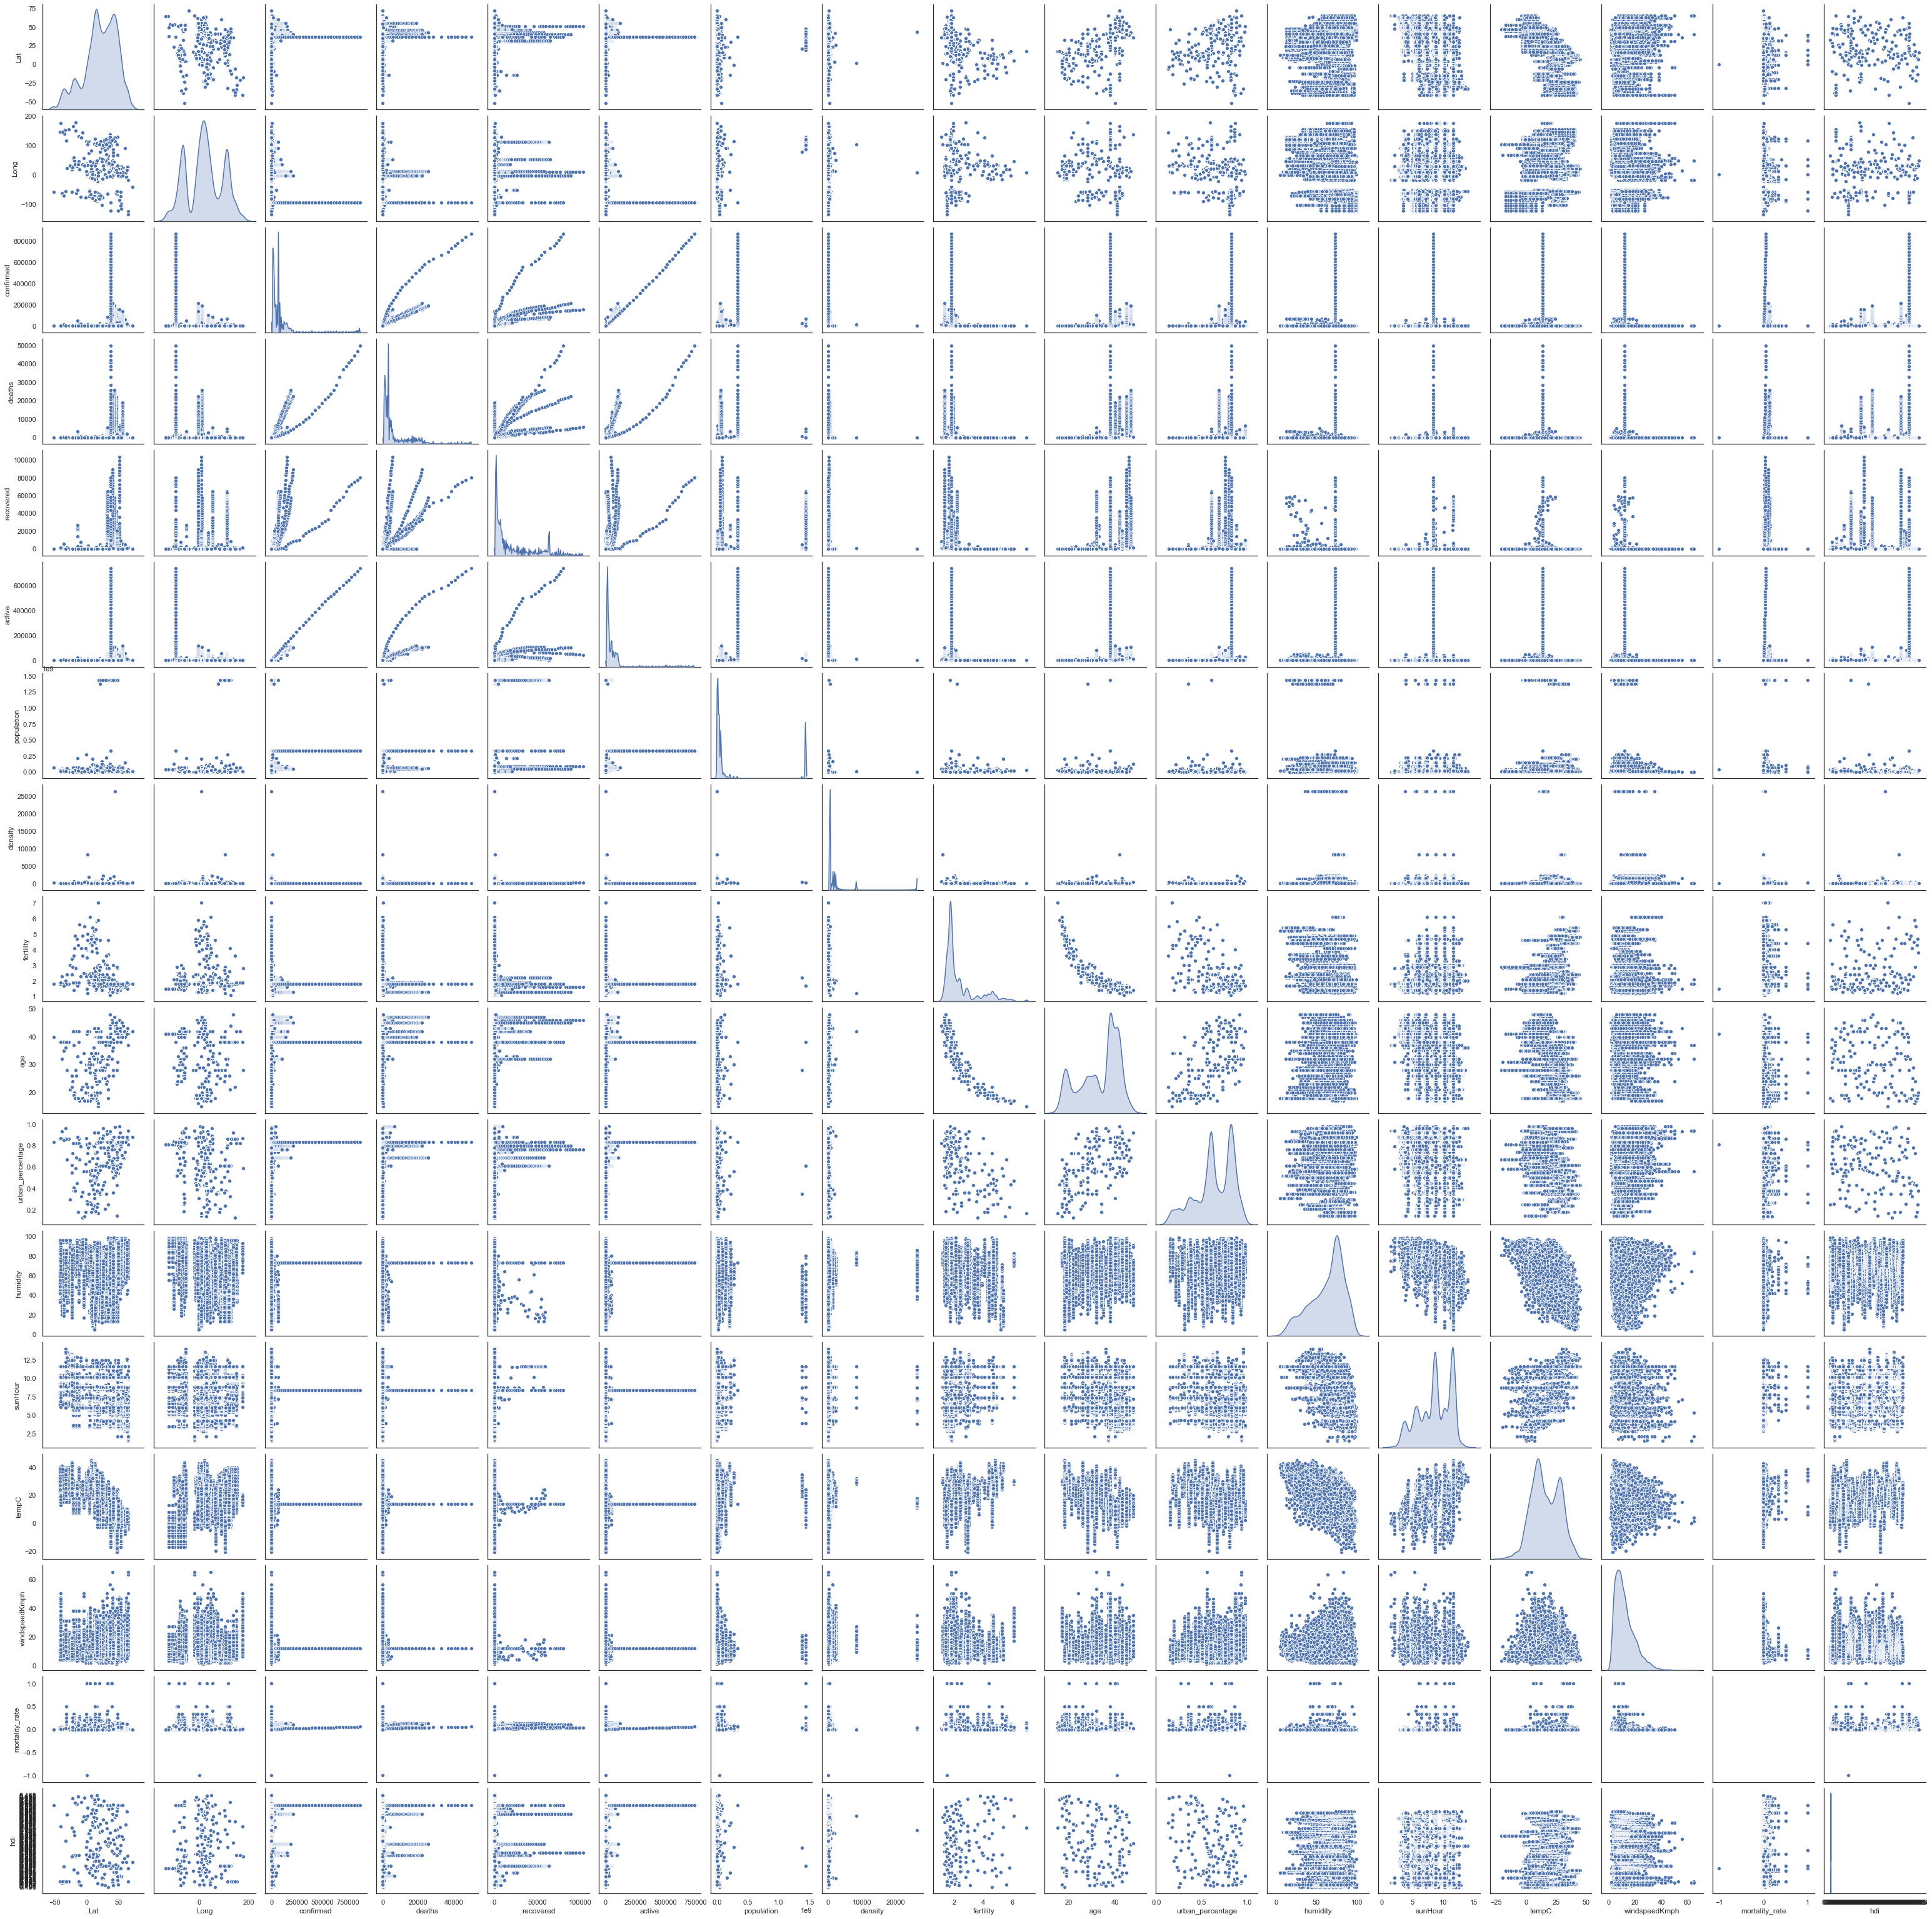

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data,diag_kind='kde')

In [22]:
datab=data

In [24]:
data=datab

In [25]:
#data.groupby([ 'country','date'])['humidity'].mean()
data['humidity'] = data['humidity'].fillna(data.groupby('country')['humidity'].transform('mean'))
data['sunHour'] = data['sunHour'].fillna(data.groupby('country')['sunHour'].transform('mean'))
data['tempC'] = data['tempC'].fillna(data.groupby('country')['tempC'].transform('mean'))
data['windspeedKmph'] = data['windspeedKmph'].fillna(data.groupby('country')['windspeedKmph'].transform('mean'))

In [26]:
data = data[data['date'] == max(data['date'])].reset_index()

In [27]:
data

index state         country        Lat       Long       date  confirmed  \
0       92           afghanistan  33.000000  65.000000 2020-04-23       1279   
1      185               albania  41.153300  20.168300 2020-04-23        663   
2      278               algeria  28.033900   1.659600 2020-04-23       3007   
3      371               andorra  42.506300   1.521800 2020-04-23        723   
4      464                angola -11.202700  17.873900 2020-04-23         25   
..     ...   ...             ...        ...        ...        ...        ...   
244  22784          sierra leone   8.460555 -11.779889 2020-04-23         64   
245  22877                malawi -13.254308  34.301525 2020-04-23         33   
246  22970           south sudan   6.877000  31.307000 2020-04-23          5   
247  23063        western sahara  24.215500 -12.885800 2020-04-23          6   
248  23156                 yemen  15.552727  48.516388 2020-04-23          1   

     deaths  recovered  active  ...  density  fertility   age  \
0        42        179    1058  ...       60        4.6  18.0   
1        27        385     251  ...      105        1.6  36.0   
2       407       1355    1245  ...       18        3.1  29.0   
3        37        333     353  ...      164        NaN   NaN   
4         2          6      17  ...       26        5.6  17.0   
..      ...        ...     ...  ...      ...        ...   ...   
244       1         10      53  ...      111        4.3  19.0   
245       3          3      27  ...      203        4.3  18.0   
246       0          0       5  ...       18        4.7  19.0   
247       0          5       1  ...        2        2.4  28.0   
248       0          0       1  ...       56        3.8  20.0   

     urban_percentage   humidity    sunHour      tempC  windspeedKmph  \
0                0.25  56.933333   8.015000   6.216667       6.716667   
1                0.63  69.900000   7.748333  13.950000       7.283333   
2                0.73  61.716667  10.275000  19.566667      10.550000   
3                0.88  75.233333   8.898333   7.383333       6.966667   
4                0.67        NaN        NaN        NaN            NaN   
..                ...        ...        ...        ...            ...   
244              0.43        NaN        NaN        NaN            NaN   
245              0.18        NaN        NaN        NaN            NaN   
246              0.25        NaN        NaN        NaN            NaN   
247              0.87        NaN        NaN        NaN            NaN   
248              0.38        NaN        NaN        NaN            NaN   

     mortality_rate    hdi  
0          0.032838  0.496  
1          0.040724  0.791  
2          0.135351  0.759  
3          0.051176  0.857  
4          0.080000  0.574  
..              ...    ...  
244        0.015625  0.438  
245        0.090909  0.485  
246        0.000000  0.413  
247        0.000000    NaN  
248        0.000000  0.463  

[249 rows x 21 columns]

In [28]:
data=data.drop(['date','state','age'], axis = 1) 

In [29]:
data.head()

index      country      Lat     Long  confirmed  deaths  recovered  active  \
0     92  afghanistan  33.0000  65.0000       1279      42        179    1058   
1    185      albania  41.1533  20.1683        663      27        385     251   
2    278      algeria  28.0339   1.6596       3007     407       1355    1245   
3    371      andorra  42.5063   1.5218        723      37        333     353   
4    464       angola -11.2027  17.8739         25       2          6      17   

   population  density  fertility  urban_percentage   humidity    sunHour  \
0    38742911       60        4.6              0.25  56.933333   8.015000   
1     2878420      105        1.6              0.63  69.900000   7.748333   
2    43685618       18        3.1              0.73  61.716667  10.275000   
3       77240      164        NaN              0.88  75.233333   8.898333   
4    32644783       26        5.6              0.67        NaN        NaN   

       tempC  windspeedKmph  mortality_rate    hdi  
0   6.216667       6.716667        0.032838  0.496  
1  13.950000       7.283333        0.040724  0.791  
2  19.566667      10.550000        0.135351  0.759  
3   7.383333       6.966667        0.051176  0.857  
4        NaN            NaN        0.080000  0.574

In [30]:
#data=data.fillna('0')
#cols=['fertility','urban_percentage','humidity','sunHour','tempC','windspeedKmph','mortality_rate','hdi']
#data[cols] = data[cols].apply(pd.to_numeric, errors='coerce', axis=1)
data['hdi'] = data['hdi'].apply(pd.to_numeric, errors='coerce')

In [31]:
data.head()


index      country      Lat     Long  confirmed  deaths  recovered  active  \
0     92  afghanistan  33.0000  65.0000       1279      42        179    1058   
1    185      albania  41.1533  20.1683        663      27        385     251   
2    278      algeria  28.0339   1.6596       3007     407       1355    1245   
3    371      andorra  42.5063   1.5218        723      37        333     353   
4    464       angola -11.2027  17.8739         25       2          6      17   

   population  density  fertility  urban_percentage   humidity    sunHour  \
0    38742911       60        4.6              0.25  56.933333   8.015000   
1     2878420      105        1.6              0.63  69.900000   7.748333   
2    43685618       18        3.1              0.73  61.716667  10.275000   
3       77240      164        NaN              0.88  75.233333   8.898333   
4    32644783       26        5.6              0.67        NaN        NaN   

       tempC  windspeedKmph  mortality_rate    hdi  
0   6.216667       6.716667        0.032838  0.496  
1  13.950000       7.283333        0.040724  0.791  
2  19.566667      10.550000        0.135351  0.759  
3   7.383333       6.966667        0.051176  0.857  
4        NaN            NaN        0.080000  0.574

In [32]:
data=data.groupby('country', as_index=True).agg({"confirmed": "sum","Lat":"mean","Long":"mean",'deaths': "sum",
       'recovered': "sum", 'active': "sum", 'population':"mean", 'density':"mean", 'fertility':"mean",
       'urban_percentage':"mean", 'humidity':"mean", 'sunHour':"mean", 'tempC':"mean", 'windspeedKmph':"mean",
       'mortality_rate':"mean", 'hdi':"mean"}).reset_index()

In [33]:
data = data.sort_values(by='confirmed', ascending=False)
data.head(10)

country  confirmed        Lat        Long  deaths  recovered  active  \
164       us     869170  37.090200  -95.712900   49954      80203  739013   
145    spain     213024  40.000000   -4.000000   22157      89250  101617   
78     italy     189973  43.000000   12.000000   25549      57576  106848   
55    france     158303   8.305673    5.429018   21889      42762   93652   
59   germany     153129  51.000000    9.000000    5575     103300   44254   
160       uk     139246  24.548173  -43.902245   18791        712  119743   
158   turkey     101790  38.963700   35.243300    2491      18491   80808   
74      iran      87026  32.000000   53.000000    5481      64843   16702   
35     china      83884  32.828385  111.649082    4636      75531    3717   
129   russia      62773  60.000000   90.000000     555       4891   57327   

     population  density  fertility  urban_percentage   humidity   sunHour  \
164   330610570       36        1.8              0.83  73.400000  8.420000   
145    46751175       94        1.3              0.80  65.666667  9.303333   
78     60479424      206        1.3              0.69  64.783333  8.176667   
55     65244628      119        1.9              0.82  72.950000  6.420000   
59     83730223      240        1.6              0.76  74.216667  5.685000   
160    67814098      281        1.8              0.83  74.583333  6.081667   
158    84153250      110        2.1              0.76  67.533333  9.120000   
74     83771587       52        2.2              0.76  44.283333  9.711667   
35   1438207241      153        1.7              0.61  39.033333  9.118333   
129   145922010        9        1.8              0.74  85.466667  5.158333   

         tempC  windspeedKmph  mortality_rate    hdi  
164  13.750000      11.800000        0.057473  0.920  
145  16.133333      12.200000        0.104012  0.893  
78   15.783333       9.666667        0.134488  0.883  
55   11.266667      17.216667        0.034535  0.891  
59    8.516667      18.200000        0.036407  0.939  
160   6.433333      15.500000        0.054550  0.920  
158   8.700000       9.850000        0.024472  0.807  
74   11.916667       8.583333        0.062981    NaN  
35    9.900000       7.850000        0.011061  0.758  
129   2.016667      15.466667        0.008841    NaN

## Temperature vs No. of Cases

In [34]:
full_latest = data#[datab['date'] == max(datab['date'])].reset_index()
print(len(full_latest))
temp_data = full_latest.groupby(['tempC', 'country'])['confirmed'].sum()
temp_data = temp_data.reset_index()
#density_data['tempC'] = pd.to_datetime(density_data['tempC'])

172


In [35]:
temp_data.sort_values(by='confirmed', ascending=False)

tempC     country  confirmed
48   13.750000          us     869170
57   16.133333       spain     213024
55   15.783333       italy     189973
39   11.266667      france     158303
24    8.516667     germany     153129
..         ...         ...        ...
69   20.683333  seychelles         11
110  29.850000    suriname         10
107  29.450000      gambia         10
114  30.883333  mauritania          7
26    8.866667      bhutan          7

[133 rows x 3 columns]

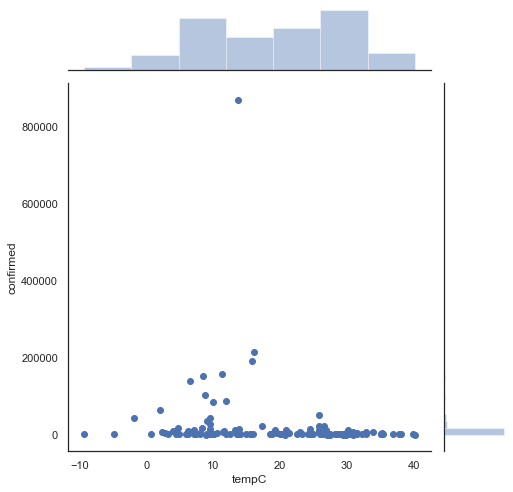

In [36]:
sns.jointplot(x="tempC", y="confirmed", data=temp_data, size=7)

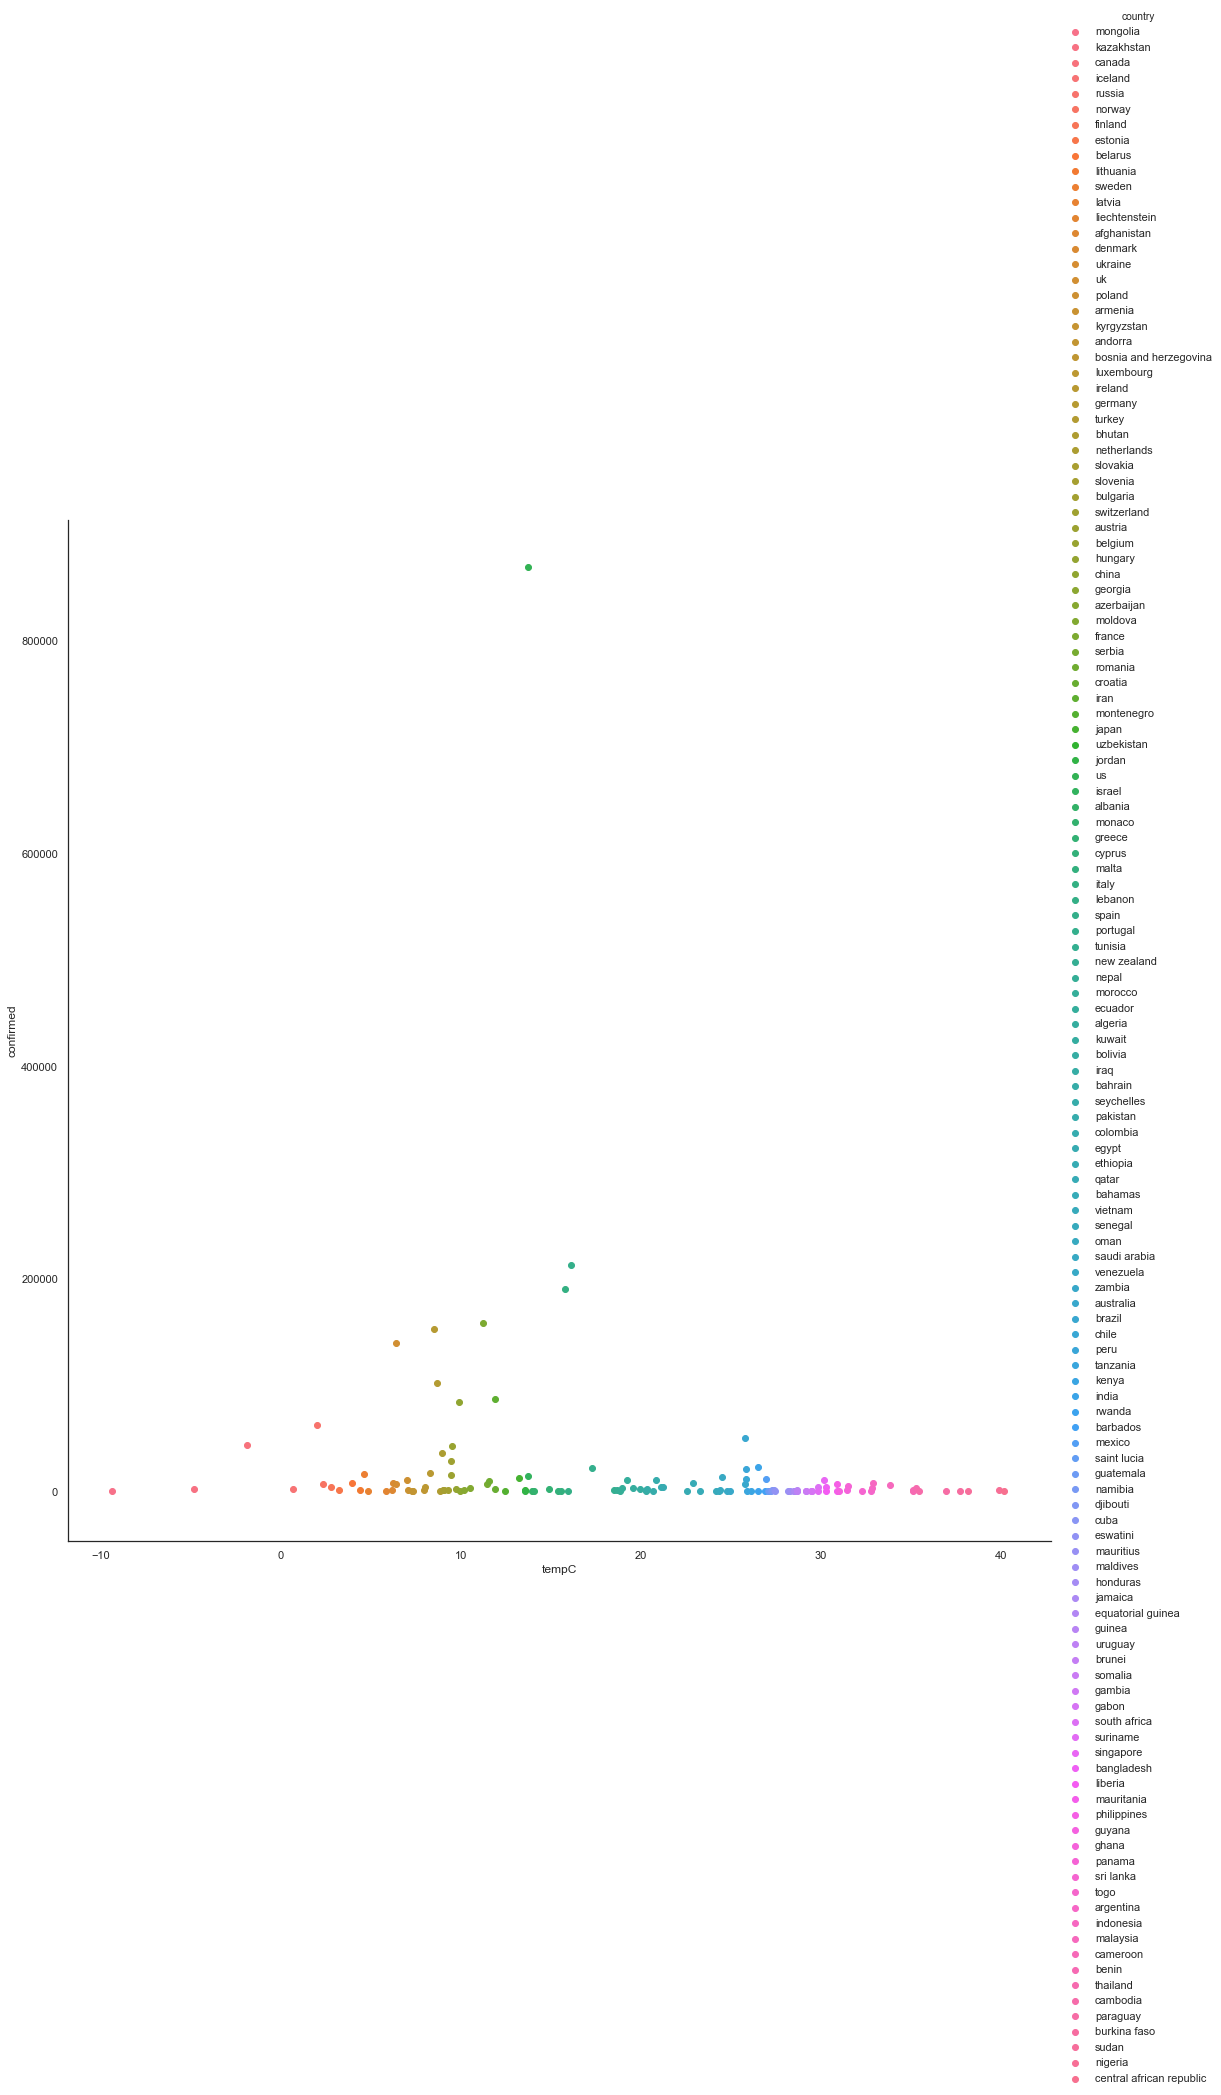

In [37]:
sns.FacetGrid(temp_data, hue="country", size=15) \
   .map(plt.scatter, "tempC", "confirmed") \
   .add_legend()

## Wind Speed vs No. of Cases

In [38]:
wind_data = data.groupby(['windspeedKmph', 'country'])['confirmed'].sum()
wind_data = wind_data.reset_index()

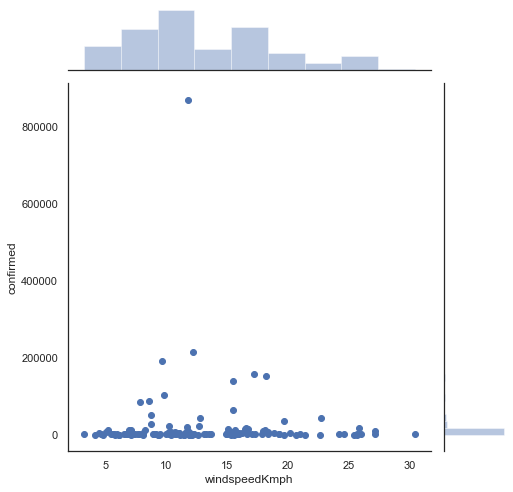

In [39]:
sns.jointplot(x="windspeedKmph", y="confirmed", data=wind_data, size=7)

## Confirmed cases by Latitude

In [40]:
Lat_data = data.groupby(['Lat', 'country'])['confirmed'].sum()
Lat_data = Lat_data.reset_index()

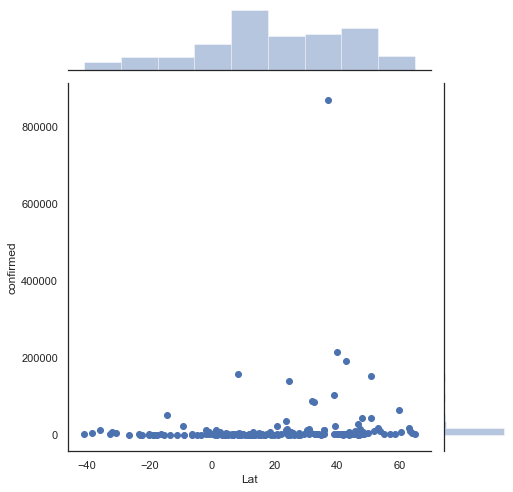

In [41]:
sns.jointplot(x="Lat", y="confirmed", data=Lat_data, size=7)

## Confirmed cases by Longitude

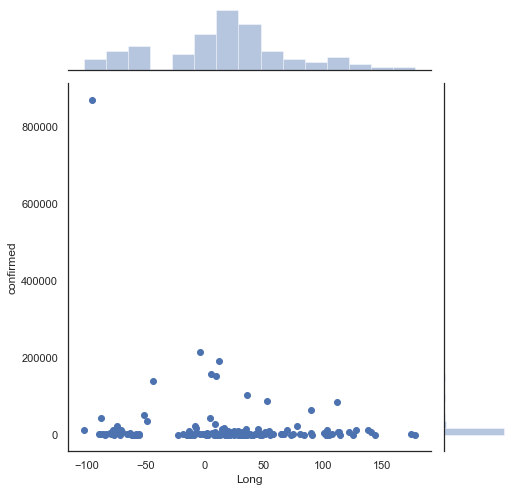

In [42]:
Long_data = data.groupby(['Long', 'country'])['confirmed'].sum()
Long_data = Long_data.reset_index()
sns.jointplot(x="Long", y="confirmed", data=Long_data, size=7)

## Urban Population vs No. of cases

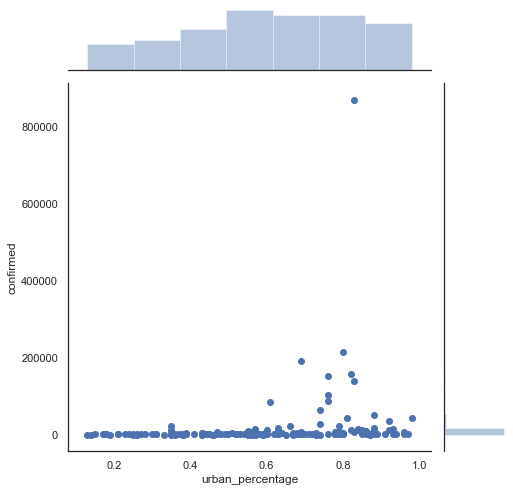

In [43]:
urban_data = data.groupby(['urban_percentage', 'country'])['confirmed'].sum()
urban_data = urban_data.reset_index()
sns.jointplot(x="urban_percentage", y="confirmed", data=urban_data, size=7)

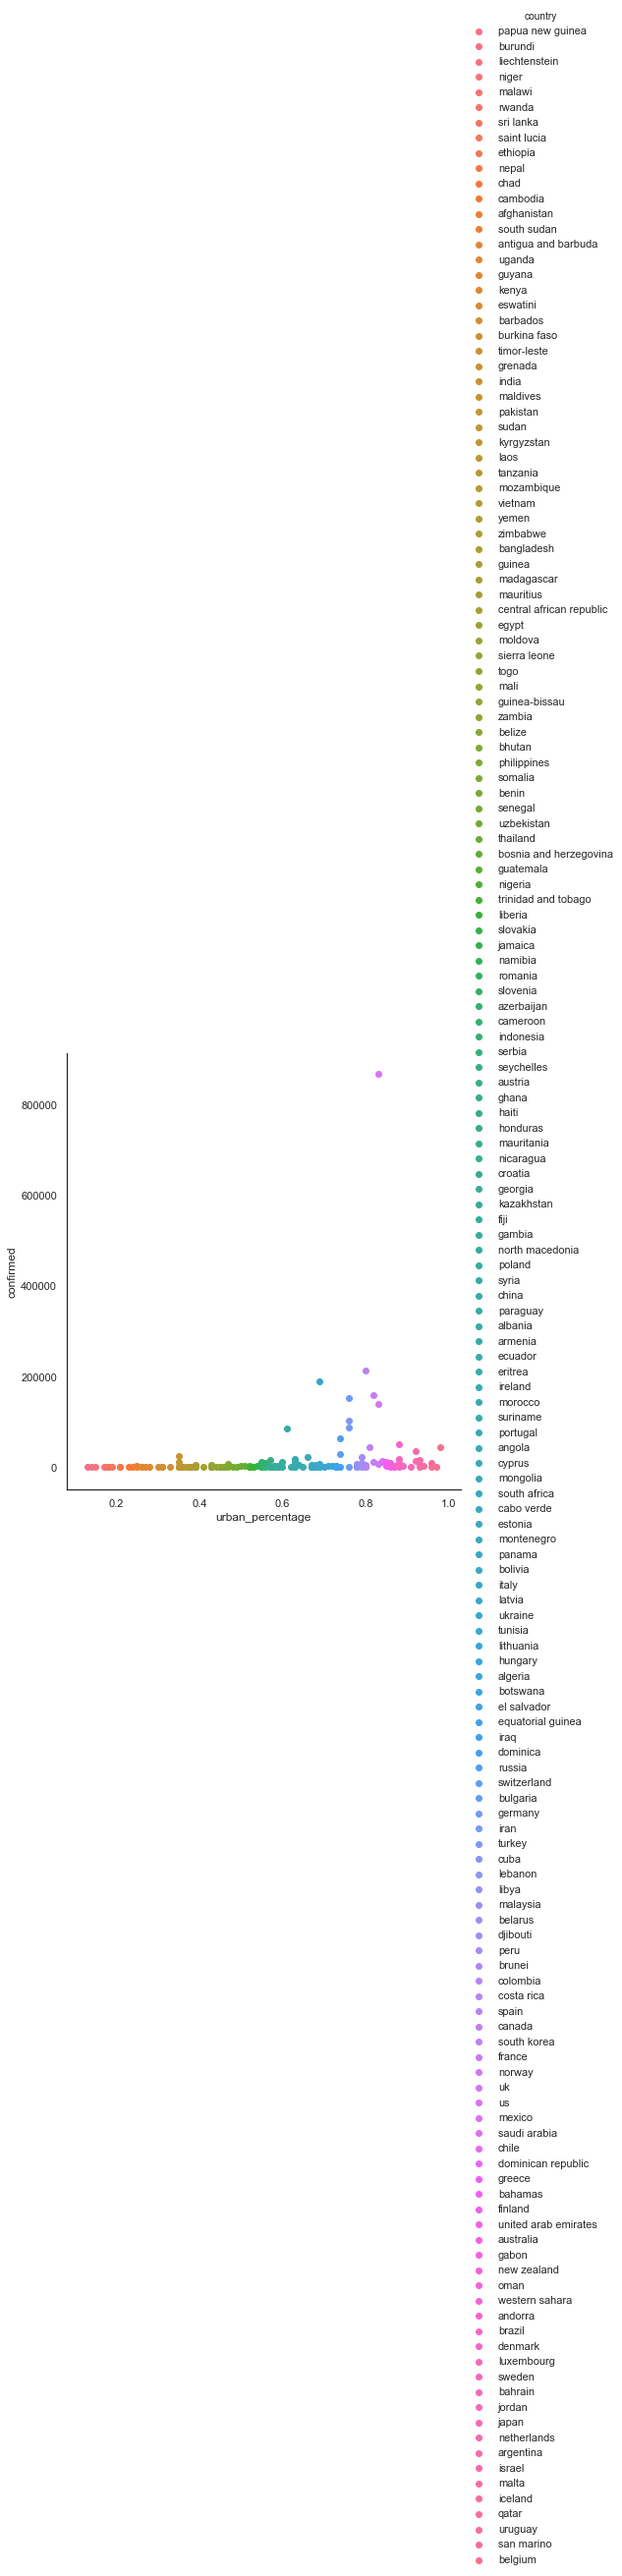

In [44]:
sns.FacetGrid(urban_data, hue="country", size=7) \
   .map(plt.scatter, "urban_percentage", "confirmed") \
   .add_legend()

### Human Development index vs No. of cases

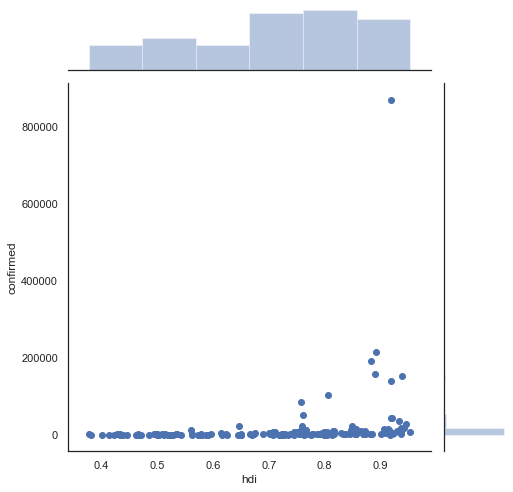

In [45]:
hdiplot_data = data.groupby(['hdi', 'country'])['confirmed'].sum()
hdiplot_data = hdiplot_data.reset_index()
sns.jointplot(x="hdi", y="confirmed", data=hdiplot_data, size=7)

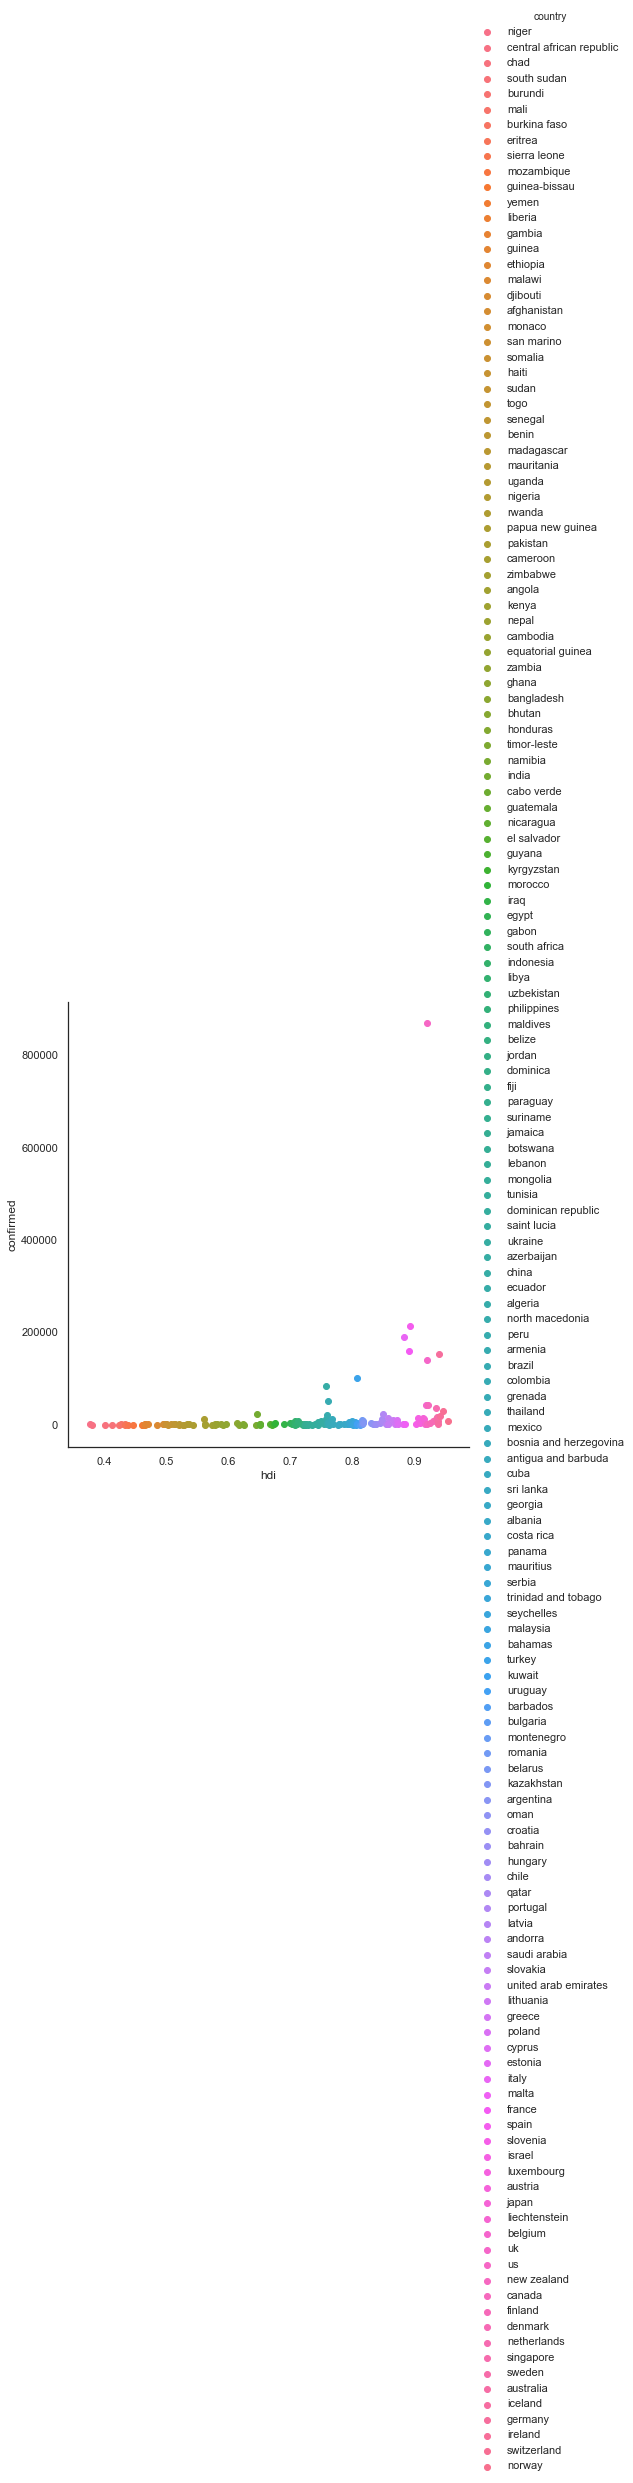

In [46]:
sns.FacetGrid(hdiplot_data, hue="country", size=7) \
   .map(plt.scatter, "hdi", "confirmed") \
   .add_legend()

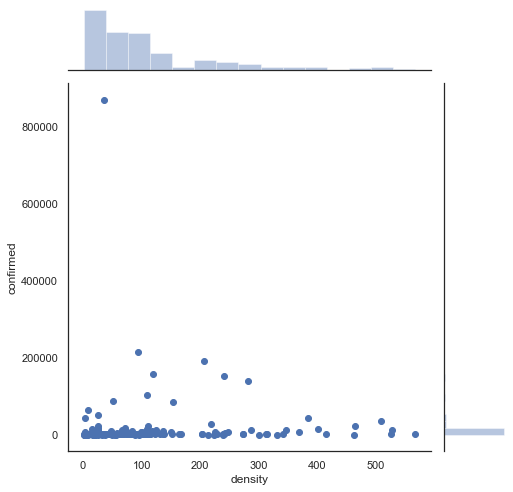

In [47]:
kool=data[data['density']<600]
densityplot_data = kool.groupby(['density', 'country'])['confirmed'].sum()
densityplot_data = densityplot_data.reset_index()
sns.jointplot(x="density", y="confirmed", data=densityplot_data, size=7)


## Running Decision Tree Regressor to understand the impact of various features on confirmed cases

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
sc=StandardScaler()
#demo = pd.read_csv("concrete.csv")
datac=data
datac=datac.replace([np.inf, -np.inf], 0)
datac=datac.fillna(0)
datac=datac.drop(['country', 'deaths', 'recovered', 'active',], axis = 1) 
X=datac.drop('confirmed',axis=1)
y=datac['confirmed']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= .15,random_state=39)
lr=DecisionTreeRegressor(criterion='mse',max_depth=16,random_state=39)


In [49]:
datac.head(10)

confirmed        Lat        Long  population  density  fertility  \
164     869170  37.090200  -95.712900   330610570       36        1.8   
145     213024  40.000000   -4.000000    46751175       94        1.3   
78      189973  43.000000   12.000000    60479424      206        1.3   
55      158303   8.305673    5.429018    65244628      119        1.9   
59      153129  51.000000    9.000000    83730223      240        1.6   
160     139246  24.548173  -43.902245    67814098      281        1.8   
158     101790  38.963700   35.243300    84153250      110        2.1   
74       87026  32.000000   53.000000    83771587       52        2.2   
35       83884  32.828385  111.649082  1438207241      153        1.7   
129      62773  60.000000   90.000000   145922010        9        1.8   

     urban_percentage   humidity   sunHour      tempC  windspeedKmph  \
164              0.83  73.400000  8.420000  13.750000      11.800000   
145              0.80  65.666667  9.303333  16.133333      12.200000   
78               0.69  64.783333  8.176667  15.783333       9.666667   
55               0.82  72.950000  6.420000  11.266667      17.216667   
59               0.76  74.216667  5.685000   8.516667      18.200000   
160              0.83  74.583333  6.081667   6.433333      15.500000   
158              0.76  67.533333  9.120000   8.700000       9.850000   
74               0.76  44.283333  9.711667  11.916667       8.583333   
35               0.61  39.033333  9.118333   9.900000       7.850000   
129              0.74  85.466667  5.158333   2.016667      15.466667   

     mortality_rate    hdi  
164        0.057473  0.920  
145        0.104012  0.893  
78         0.134488  0.883  
55         0.034535  0.891  
59         0.036407  0.939  
160        0.054550  0.920  
158        0.024472  0.807  
74         0.062981  0.000  
35         0.011061  0.758  
129        0.008841  0.000

In [50]:
scaledXtrain= sc.fit_transform(Xtrain)
scaledXtest = sc.transform(Xtest)
lr.fit(scaledXtrain,ytrain)
print("Training R2")
print(lr.score(scaledXtrain,ytrain))
print("Testing R2")
print(lr.score(scaledXtest,ytest))
predicted = lr.predict(scaledXtest)
#print("RMSE")
#print(np.sqrt(mean_squared_error(predicted, ytest)))
lr.fit(scaledXtrain,ytrain)
print("R-Squared on train dataset={}".format(lr.score(scaledXtest,ytest)))

lr.fit(scaledXtest,ytest)   
print("R-Squared on test dataset={}".format(lr.score(scaledXtest,ytest)))

Training R2
1.0
Testing R2
0.9142821477640453
RMSE
5689.982327267404
R-Squared on train dataset=0.9142821477640453
R-Squared on test dataset=1.0


In [51]:
from sklearn.tree import export_graphviz
export_graphviz(lr, out_file='tree.dot', feature_names=[ 'Lat', 'Long', 
       'population', 'density', 'fertility', 'urban_percentage', 'humidity',
       'sunHour', 'tempC', 'windspeedKmph', 'mortality_rate', 'hdi'])

In [52]:
!dot -Tpng tree.dot > tree.png # to convert the tree in a png image

Error: dot: can't open #
Error: dot: can't open to
Error: dot: can't open convert
Error: dot: can't open the
Error: dot: can't open tree
Error: dot: can't open in
Error: dot: can't open a
Error: dot: can't open png
Error: dot: can't open image


### DECISION TREE INDICATORS

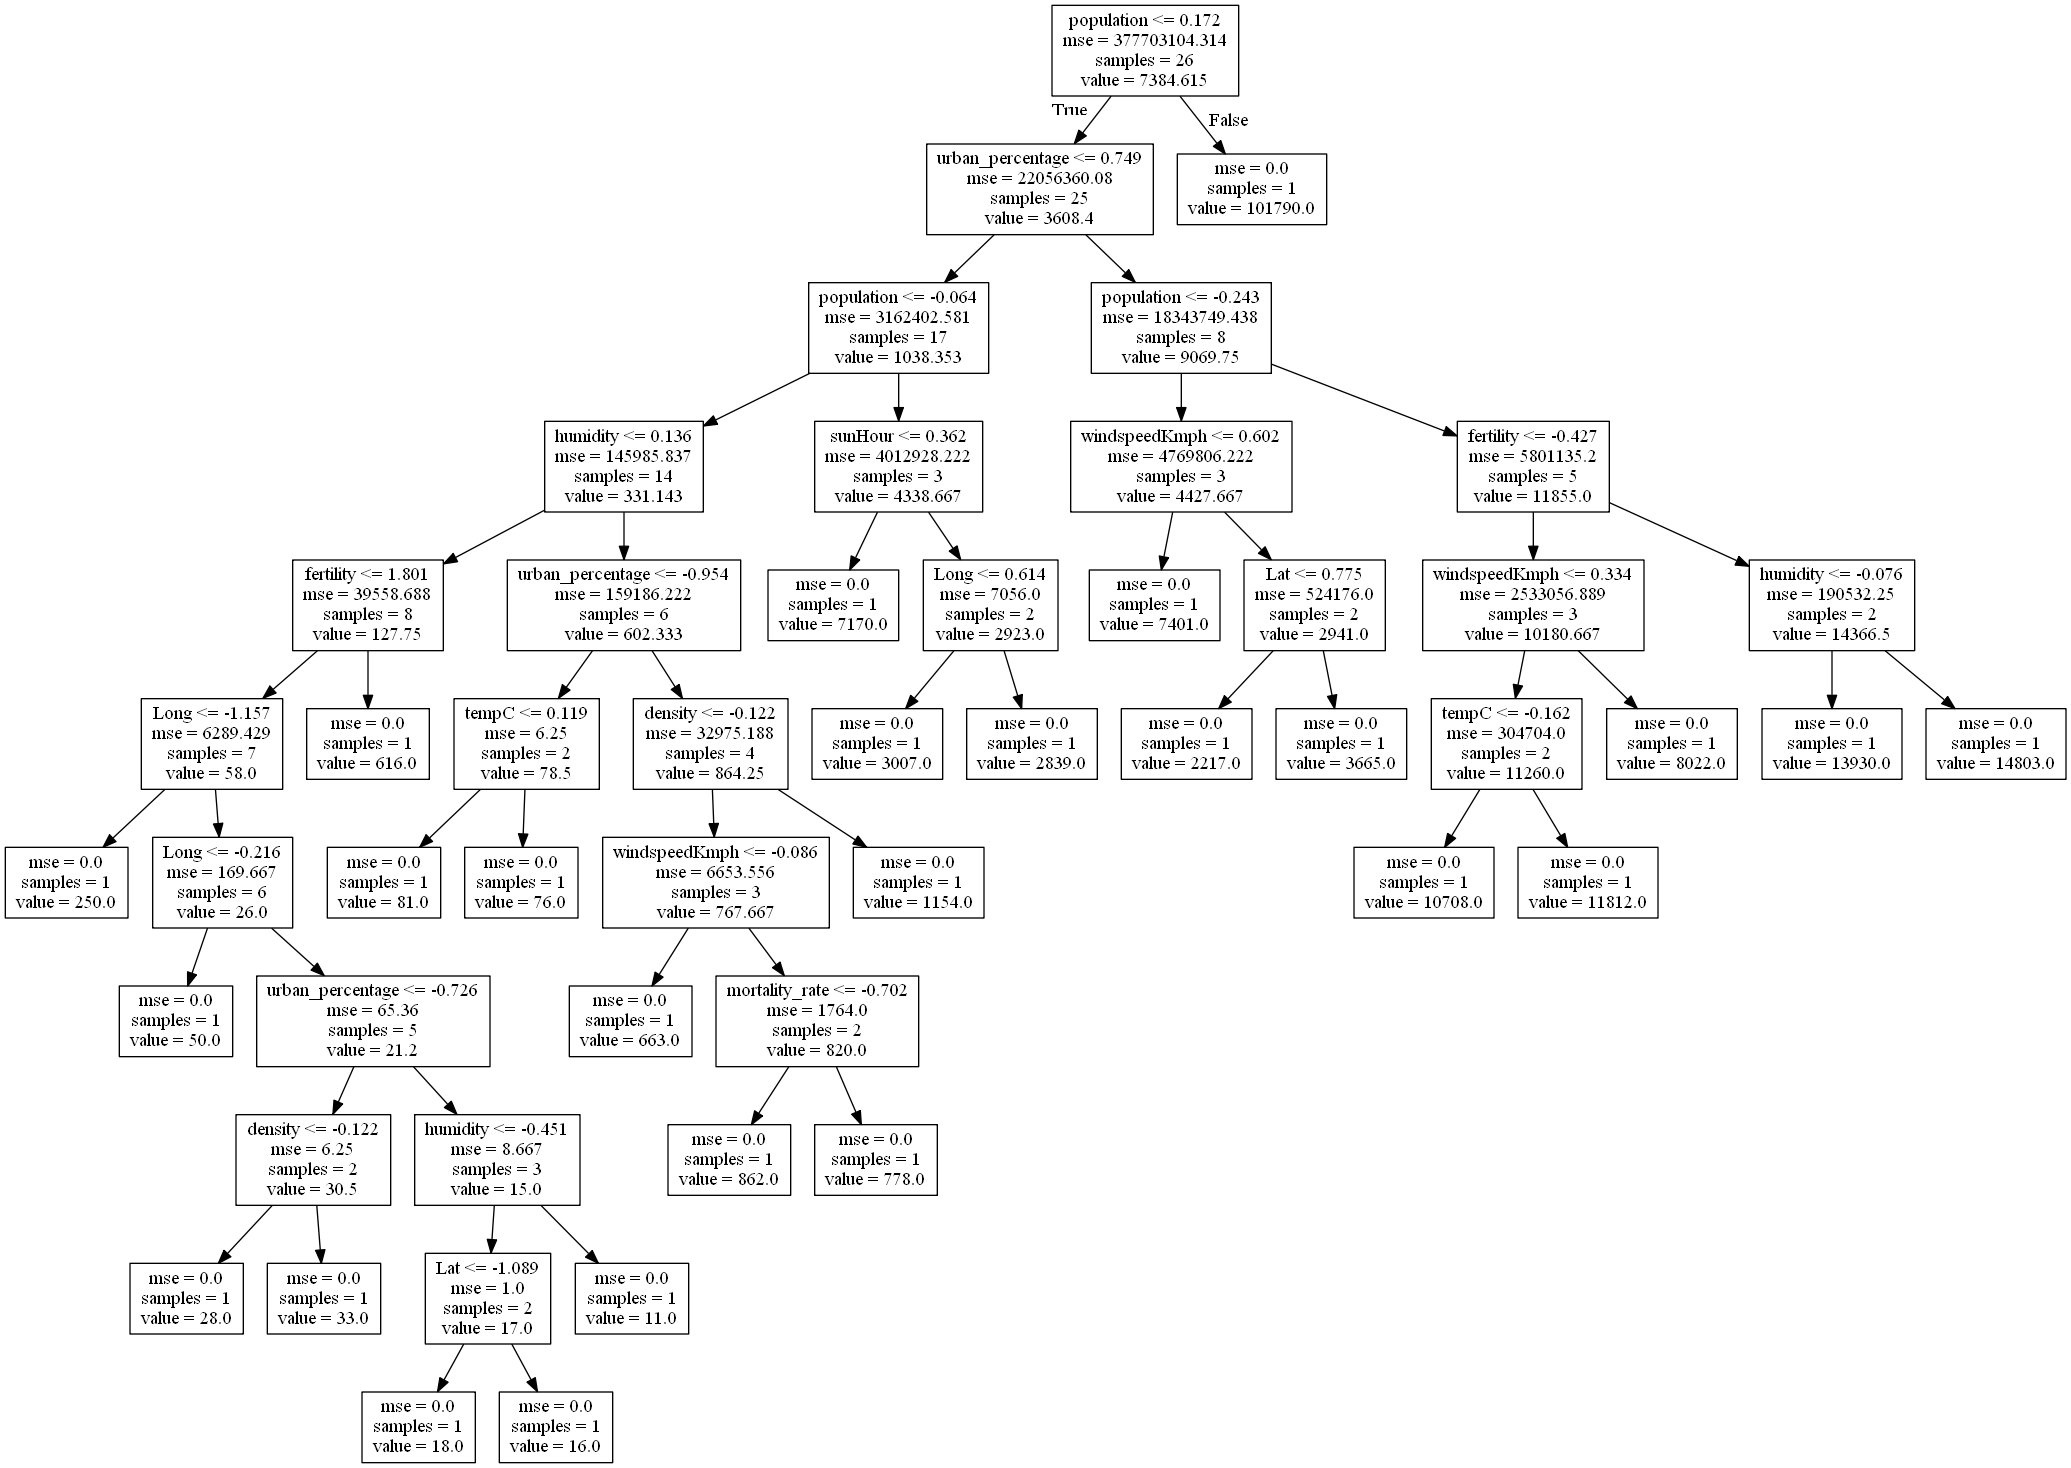

In [53]:
from IPython.display import Image
Image(filename='tree.png') 

In [70]:

layout1 = dict(
title = 'COVID-19 Confirmed Cases',
geo = dict(
    Displayframe = False,
    Displayocean = True,
    ocean_color = 'rgb(140,255,255)',
    projection = dict(
    type = 'cyl',
        rotation = dict(
                lon = 60,
                lat = 10),
    ),
    lonaxis =  dict(
            showgrid = True,
            gridcolor = 'rgb(10, 10, 10)'
        ),
    lataxis = dict(
            showgrid = True,
            gridcolor = 'rgb(10, 10, 10)'
            )
        ),
    )
graph = dict(data=data, layout=layout1)
py.iplot(graph, validate=False)



## CONCLUSION

1. Developed Countries(High HDI) are more impacted
2. Urban Population are more impacted
3. Countries/Region in between (+25 degree and +60 degree lattitude) and (-60 longitude and +50 longitude) are more impacted
4. Windspeed though not a strong indicator , it higlights Wind speed speed between 7kmph and 20kmph  will carry virus across regions efficiently
5. Temperature <20 degree seems to be more impacted 
